# Lecture 10.2: Iterations and Vectorization
In this lecture we'll learn about:
- [Iteration](#Iteration): `for`/`while` loops.
- [Functional programming](#Functional-programming) (FP): functions that operate on other functions.



In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Iteration
Iteration means, roughly, "running the same piece of code repeatedly". There are many ways to perform iteration in R. The one you have probably heard of is the *for loop*:
```{r}
for (<index> in <vector>) {
    [do something for each value of <index>]
}
```

In [2]:
for ( i in 1:10 ) {
   cat(i, '\n')
}

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 


Note that the loop and the iterator are evaluated within the global environment.



In [3]:
for ( var in names(mtcars) ) {
  cat( sprintf('average %s = %4.3f', var, mean(mtcars[, var]) ), '\n')
}

average mpg = 20.091 
average cyl = 6.188 
average disp = 230.722 
average hp = 146.688 
average drat = 3.597 
average wt = 3.217 
average qsec = 17.849 
average vs = 0.438 
average am = 0.406 
average gear = 3.688 
average carb = 2.812 


#### while

A while statement can be useful when you aren’t sure how many iterations are needed. 

Here is an example that takes a random walk and terminates if the value is more than 10 units from 0.

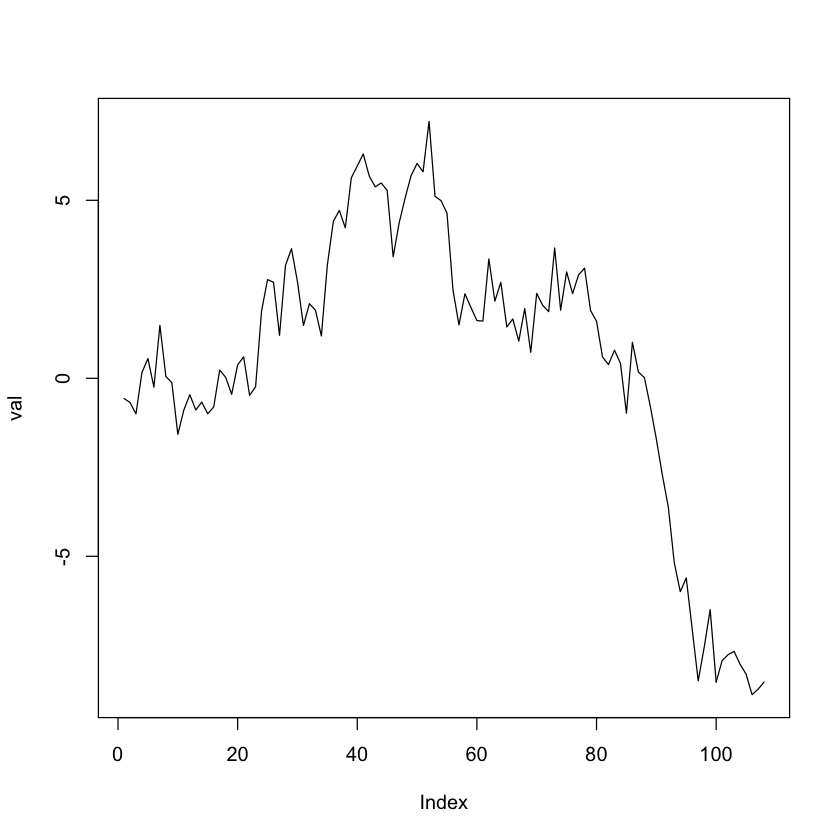

In [4]:
maxIter = 1e3 # always limit the total iterations allowed
val = vector( mode = 'numeric', length = maxIter)
val[1] = rnorm(1) ## initialize

k = 1
while ( abs(val[k]) < 10 && k <= maxIter ) {
  val[k + 1] = val[k] + rnorm(1)
  k = k + 1
}
val = val[1:{k - 1}]

plot(val, type = 'l')

#### key words
The following key words are useful within loops:

- break - break out of the currently excuting loop
- next - move to the next iteration immediately, without executing the rest of this iteration (continue in other languages such as C++)

Here is an example using next:



In [5]:
for ( i in 1:10 ) {
  if ( i %% 2 == 0 ) next
  cat(i,'\n')
}

1 
3 
5 
7 
9 


## Conditionals

In programming, we often need to execute a piece of code only if some condition is true. Here are some of the R tools for doing this.



#### if statements

The workhorse for conditional execution in `R` is the if statement.
In the syntax below, note the spacing around the condition enclosed in the parentheses.

In [6]:
if ( TRUE ) {
  print('do something if true')
}

[1] "do something if true"


Use an else to control the flow without separately checking the condition’s negation:



In [7]:
if ( {2 + 2} == 5 ) {
  print('the statement is true')
} else {
  print('the statement is false')
}

[1] "the statement is false"


In [8]:
result = c(4, 5)
report = ifelse( {2 + 2} == result, 'true', 'false')
report

[1] "true"  "false"

As you can see above, there is also an ifelse() function that can be useful.

For more complex cases, you may want to check multiple conditions:




In [9]:
a = -1
b = 1

if ( a * b > 0 ) {
  print('Zero is not between a and b')
} else if ( a < b ) {
    smaller = a
    larger = b
} else {
    smaller = b
    larger  = a
}

c(smaller, larger)

[1] -1  1

### Class Exercise

Write a function to convert a 24-hour time, given as an integer, to a 12-hour time followed by am or pm.  That is, if you input 21, your funciton should output "9pm". 



In [10]:
convert_time = function(time){
    # converts a 24-hour time, given as an integer, to a 12-hour time
    # Inputs: time - an integer between 0 to 23
    # Output: a character vector, e.g., 4am, or 12pm.
    sprintf('%2i%s', time %% 12, c("am", "pm")[1+time %/% 12])    
  #  sprintf('%2i%s', ifelse(time %in% c(0, 12), 12, time %% 12), c("am", "pm")[1+time %/% 12]    )
}

convert_time(12)

#vapply(0:23, FUN = convert_time, FUN.value = "12pm")

[1] " 0pm"

#### switch

Use a switch when you have multiple discrete options.

Here is an example:

In [11]:
cases = function(x) {
  switch(as.character(x),
    a=1,
    b=2,
    c=3,
    "Neither a, b, nor c."
  )
}
cases("a")

[1] 1

In [12]:
cases("m")
cases(8)



[1] "Neither a, b, nor c."

[1] "Neither a, b, nor c."

In [13]:
center <- function(x, type){
    switch(type, mean = mean(x),
          median = median(x),
          trimmed = mean(x, trim=0.1))
}
x <- rcauchy(10)
center(x,"mean")
center(x,"median")
center(x,"trimmed")

[1] 0.2125972

[1] 0.07906886

[1] 0.1636386

A `switch` can also be used with a numeric expression



In [14]:
for( i in c(-1:3, 9) ) {
  print( switch(i, 1, 2, 3, 4) )
}

NULL
NULL
[1] 1
[1] 2
[1] 3
NULL


In [15]:
mySummary = function(x) {
  
  switch(class(x),
         factor=table(x),
         numeric=sprintf('mean=%4.2f, sd=%4.2f', mean(x), sd(x)),
          'Only defined for factor and numeric classes.')
  
}

for ( var in names(iris) ) {
  cat(var, ':\n', sep = '')
  print( mySummary(iris[, var]) )
}

Sepal.Length:
[1] "mean=5.84, sd=0.83"
Sepal.Width:
[1] "mean=3.06, sd=0.44"
Petal.Length:
[1] "mean=3.76, sd=1.77"
Petal.Width:
[1] "mean=1.20, sd=0.76"
Species:
x
    setosa versicolor  virginica 
        50         50         50 


### Class Exercises:

1. Read the R code below and determine the value of twos and threes at the end.



In [ ]:
twos = 0
threes = 0
for ( i in 1:10 ) {
  if ( i %% 2 == 0 ) {
    twos = twos + i
  } else if ( i %% 3 == 0 ) {
    threes = threes + i 
  }
}



2. Read the R code below and determine the value of x at the end.



In [16]:
x = 0
for ( i in 1:10 ) {
  x = x + switch(1 + {i %% 3}, 1, 5, 10)
}

## Vectorization

Vectorization is a programming concept in which loops are encapsulated within function calls in order to improve the readability of program code.  In high-level interpreted languages such as R, this also is a means of improving efficiency by making use of loops implemented in lower level source code (e.g. C). While loops (`for`, `while`, `apply()`, etc.) have their place in well-written R code,  it is often the case that inefficient or bloated R code can be improved through vectorization.

Vectorization is a programming technique used to avoid explicit loops in order to improve the performance and readability of code.

In its simplest form, vectorization means using built in vectorized functions. That is, rather than looping over a vector to compute its sum, we instead use the vectorized function `sum()`.

In [17]:
# Example 1
## Not vectorized
x = -5e2:5e2

s0 = 0
for ( i in 1:length(x) ) {
  s0 = s0 + x[i]
}

## Vectorized
s1 = sum(x)

## Do we get the same sum?
s0 == s1




[1] TRUE

The vectorized code is not only easier to type and read but is also faster.



In [19]:
# Timing comparison for sums: -------------------------------------------------
library(tidyverse); library(microbenchmark)

# Functions to compare: -------------------------------------------------------
f0 = function(n) {
  # Explicit looping with indexing
  x = 0:n
  
  s0 = 0
  for ( i in 1:length(x) ) {
    s0 = s0 + x[i]
  }
  
  s0
}

f1 = function(n) {
  # Explicit looping without indexing
  
  s0 = 0
  for ( i in 1:n ) {
    s0 = s0 + i
  }
  
  s0
}

f2 = function(n){
  # Call sum
  x = 0:n
  s0 = sum(x)
  s0
}


microbenchmark( f0 = f0(1e4), f1 = f1(1e4), f2 = f2(1e4), times = 1e3 ) %>% 
  summary() 

expr,min,lq,mean,median,uq,max,neval
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
f0,215646,223231.5,227251.352,224343.0,225673,2472720,1000
f1,112983,115774.0,118359.002,116146.5,116664,1984172,1000
f2,423,463.0,2108.983,508.0,559,1194127,1000


The reason vectorization is faster has to do with the fact that R is an interpreted language and not a compiled one. The difference in time seen here is primarily due to two factors:

R needs to repeatedly interpret what your code means for each iteration of the loop;

each iteration of the for loop in f0 requires indexing into x using the subset function `.[`.

The vectorized `sum()` function also loops over and repeatedly indexes x but it does so in the compiled language C and has been optimized to take advantage of the fact that the elements of a vector are contiguous in memory.

Writing efficient R code requires an understanding of these factors and how vectorization helps to overcome them.